In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### 翌日の試合結果に関係がありそうな変数を探す

In [33]:
# 列ヘッダー名の設定
col_header = ('HV','Audience','Result','Rank','Savings','Hits','Home Runs','Stolen Bases','Strikeouts',
                     'Hits Allowed','Home Runs Allowed','Runs Allowed','Earned Runs','K')

# csvファイルから取得する列番号のリスト
col_num = [6,7,8,9,10,18,19,20,21,22,23,24,25,26]

# データ取得が可能な年度のリスト
years = [2014,2015,2016,2017,2018]

teams = ['Bs','C','D','DB','E','F','G','H','L','M','S','T']

# 勝敗を数値（敗：0 勝：1）へ変換する関数
def match_result_classify(result):
    if result == '●':
        return 0
    elif result == '○':
        return 1

In [34]:
# 2012〜2018年の全チームの試合結果DataFrameを作成する関数
# 試合結果をずらす
def combine_next_match_results():
    df_all = pd.DataFrame(index=[],columns=[])
    
    for year in years:
        for team in teams:
            # csvファイルのデータをDataFrameへ格納
            df = pd.read_csv('csv/{y}/{y}_{t}_match_results.csv'.format(y=year,t=team),
                             sep=',',names=col_header,usecols=col_num)

            # 勝敗をずらす
            df['Next Result'] = df['Result'].shift(1)
            
            # 勝敗列の削除
            df = df.drop('Result',axis=1)
            
            # NaNと引き分けを除外
            for i in range(len(df)):
                if pd.isnull(df.loc[i,'Next Result']) or df.loc[i,'Next Result'] == '△':
                    df = df.drop(i)        
                    
            # 関数match_result_classifyを適用
            df['Next Result'] = df['Next Result'].apply(match_result_classify)

            df_all = pd.concat([df_all,df],ignore_index=True)
            
    return df_all

In [35]:
df_next = combine_next_match_results()
df_next.head(6)

,HV,Audience,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K,Next Result
0,V,"23,100",2,17,14,2,3,9,4,0,0,0,7,1
1,V,"38,561",2,16,8,0,1,9,6,0,2,2,8,1
2,V,"17,681",2,17,11,2,0,5,10,0,3,3,9,0
3,V,"19,129",2,16,10,1,1,4,6,1,4,3,8,1
4,V,"30,076",2,15,6,0,1,6,6,1,4,4,10,1
5,V,"37,837",2,16,6,0,2,7,12,1,3,3,6,0


In [36]:
df_next.tail()

,HV,Audience,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K,Next Result
8365,V,"28,312",3,1,8,0,0,12,3,0,0,0,13,0
8366,V,"27,935",4,0,8,0,0,5,4,0,1,1,3,1
8367,V,"45,993",4,-1,5,2,0,4,5,1,3,3,13,1
8368,V,"45,963",3,0,12,1,0,9,11,1,8,8,10,0
8369,V,"46,318",2,1,13,2,0,7,8,0,1,1,7,0


In [37]:
len(df_next)

8370

In [38]:
# 勝敗でグループ化して平均値を算出
df_next.groupby('Next Result').mean()

,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K
Next Result,,,,,,,,,,,
0,3.627240,-0.966308,8.509916,0.811470,0.583274,7.104421,8.617204,0.843489,4.092234,3.733811,7.051374
1,3.376344,0.975866,8.612903,0.841577,0.571326,7.095102,8.517802,0.806213,3.984468,3.616726,7.162963


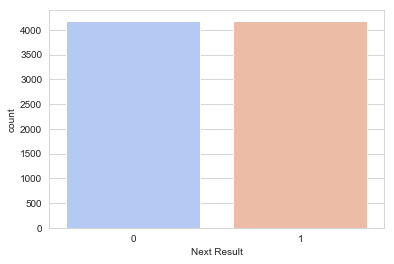

In [39]:
sns.countplot('Next Result',data=df_next,palette='coolwarm')

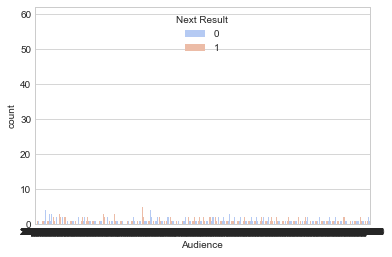

In [41]:
sns.countplot('Audience',data=df_next,hue='Next Result',palette='coolwarm')

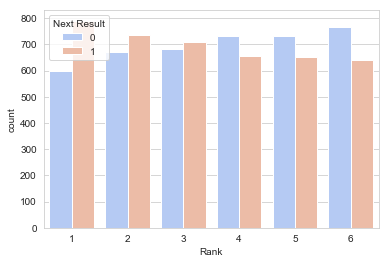

In [40]:
sns.countplot('Rank',data=df_next,hue='Next Result',palette='coolwarm')

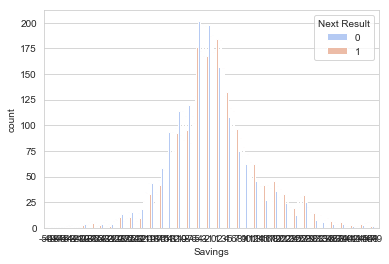

In [41]:
sns.countplot('Savings',data=df_next,hue='Next Result',palette='coolwarm')

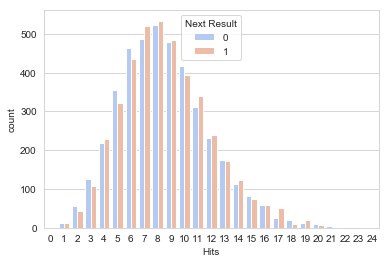

In [42]:
sns.countplot('Hits',data=df_next,hue='Next Result',palette='coolwarm')

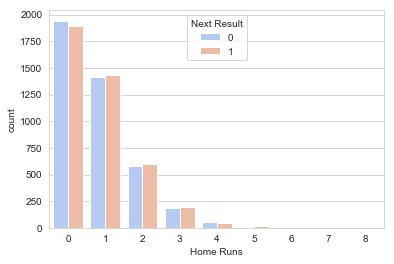

In [43]:
sns.countplot('Home Runs',data=df_next,hue='Next Result',palette='coolwarm')

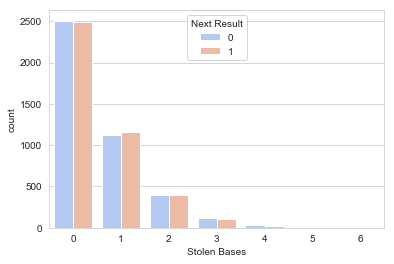

In [44]:
sns.countplot('Stolen Bases',data=df_next,hue='Next Result',palette='coolwarm')

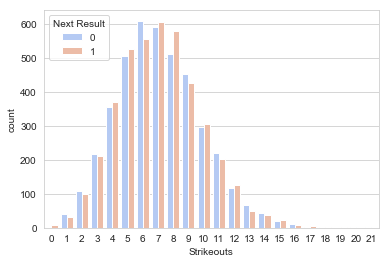

In [45]:
sns.countplot('Strikeouts',data=df_next,hue='Next Result',palette='coolwarm')

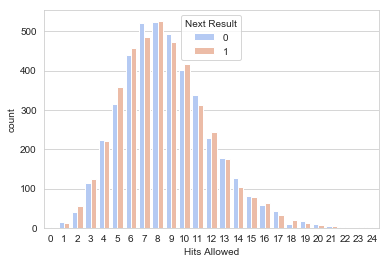

In [46]:
sns.countplot('Hits Allowed',data=df_next,hue='Next Result',palette='coolwarm')

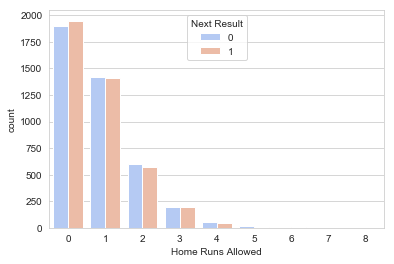

In [47]:
sns.countplot('Home Runs Allowed',data=df_next,hue='Next Result',palette='coolwarm')

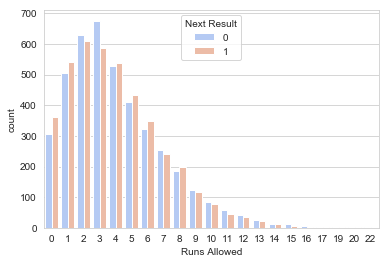

In [48]:
sns.countplot('Runs Allowed',data=df_next,hue='Next Result',palette='coolwarm')

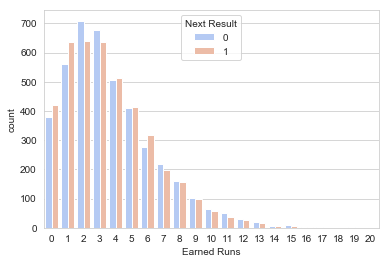

In [49]:
sns.countplot('Earned Runs',data=df_next,hue='Next Result',palette='coolwarm')

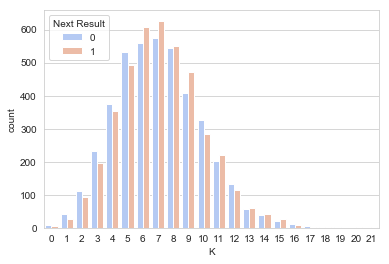

In [50]:
sns.countplot('K',data=df_next,hue='Next Result',palette='coolwarm')

## →このやり方では無理っぽい

## 一応モデルにつっこんでみる

In [51]:
# カテゴリーを表現する変数をダミー変数に展開
hv_dummies = pd.get_dummies(df_next['HV'])
hv_dummies.head()

,H,V
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [52]:
# 行数の確認
print(len(hv_dummies))
print(len(df_next))

8370
8370


In [53]:
X = df_next.drop(['HV','Next Result','Audience','K'],axis=1)

In [54]:
# ダミー変数を連結して説明変数のDataFrameを作成
X = pd.concat([X,hv_dummies], axis=1)

In [55]:
X.head()

,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,H,V
0,2,17,14,2,3,9,4,0,0,0,0,1
1,2,16,8,0,1,9,6,0,2,2,0,1
2,2,17,11,2,0,5,10,0,3,3,0,1
3,2,16,10,1,1,4,6,1,4,3,0,1
4,2,15,6,0,1,6,6,1,4,4,0,1


In [56]:
# Yに目的変数を格納
Y = df_next['Next Result']
Y.head(6)

0    1
1    1
2    0
3    1
4    1
5    0
Name: Next Result, dtype: int64

In [57]:
# 目的変数をリストに変換
Y = Y.values
Y

array([1, 1, 0, ..., 1, 0, 0])

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
# 性能の評価用
from sklearn import metrics

/Users/takahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
log_model = LogisticRegression()

# モデルの作成
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
# 変数名とその係数を格納するDataFrameを作成
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T
coeff_df

,0,1
0,Rank,-0.0354189
1,Savings,0.00808061
2,Hits,0.00874494
3,Home Runs,0.00941954
4,Stolen Bases,-0.0403428
5,Strikeouts,0.00507067
6,Hits Allowed,-0.00461348
7,Home Runs Allowed,-0.0261017
8,Runs Allowed,0.0230393
9,Earned Runs,-0.0251295


In [61]:
# データを学習用とテスト用に分割する
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [62]:
# 新しいモデルを作成
log_model2 = LogisticRegression()

In [63]:
# 学習用のデータだけでモデルを鍛える
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
# テスト用データを使って予測
class_predict = log_model2.predict(X_test)
class_predict

array([1, 0, 1, ..., 1, 0, 0])

In [65]:
# 精度を計算
print(metrics.accuracy_score(Y_test, class_predict))

0.5298614429049212


<br>
<br>
<br>
<br>

## SVNにつっこんでみる

In [83]:
from sklearn.svm import SVC
model = SVC()

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3) 

In [85]:
# 学習
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
predicted = model.predict(X_test)
expected = Y_test

print(metrics.accuracy_score(expected,predicted))

0.5150501672240803


<br>
<br>
## ↓↓↓Baseball LABの予想的中率とほぼ一緒や（2018/10/03時点）

<img src="baseball-lab.png">